In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


#  Data Preprocessing

data.shape

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

#  Text Preprocessing

In [6]:
import re
import string

In [7]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [8]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove links

In [10]:
data["tweet"] = data["tweet"].apply(lambda x : " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x, flags=re.MULTILINE) for x in x.split()))

In [11]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [12]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [13]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Numbers

In [14]:
data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)

In [15]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove stopswords

In [16]:
!pip install nltk

In [17]:
import nltk

In [18]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [20]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [22]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [23]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [24]:
data["tweet"] = data["tweet"].apply(lambda x : " ".join(ps.stem(x) for x in x.split()))

In [25]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [26]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [27]:
from collections import Counter
vocab = Counter()

In [28]:
vocab

Counter()

In [29]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [30]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [31]:
len(vocab)

15949

In [32]:
tokens = [key for key in vocab if vocab[key] > 10]

In [33]:
len(tokens)

1145

In [34]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [35]:
def save_vocabulary(lines, filename):
    data = "\n".join(lines)
    file = open(filename, 'w' , encoding="utf-8")
    file.write(data)
    file.close()
    
save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide Dataset

In [36]:
x = data["tweet"]
y = data["label"]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [38]:
X_train

4402           pundit among iphon user love att att iphon
6415    gain follow rt must follow follow back follow ...
3868    lock screen ladygaga lanadelray ladygaga lanad...
5094    test new camera selfi smile samsung samsung ba...
2012    could someon unseat sen chuck… news photograph...
                              ...                        
6738    photo life usa america drink iphon android car...
6341    silicon valley innov disrupt trump administr d...
62      tysonj that bit hypocrit use hashtag appl yet ...
5921    fall love diy hobbi nice theday choic instaand...
171     happi ps soni playstat gta fun design white du...
Name: tweet, Length: 6336, dtype: object

In [39]:
X_test

1937    like laugh follow us best rise comic join scen...
5819    girl till end abeecwaldon sister bff mustfollo...
3305            moment go contact isnt number iphon updat
4868    shop ralphlauren fashion ralphlauren instadail...
7491    photo new stun shesabaabexo pretti cute gorgeo...
                              ...                        
2120    suppos draft tonight fantasi dont laptoppp gim...
2       love would go talk makememori unplug relax iph...
69      rt meliiecandi appl ipadmini sold instamo plan...
2871         annoy less hour work imessag still wont work
6607    samsung led tv thank ledtv samsung instafollow...
Name: tweet, Length: 1584, dtype: object

In [40]:
def vectorizer(ds,vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
    
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [41]:
vectorizered_x_train = vectorizer(X_train, tokens)

In [42]:
vectorizered_x_test = vectorizer(X_test, tokens)

In [43]:
y_train.value_counts()

label
0    4728
1    1608
Name: count, dtype: int64

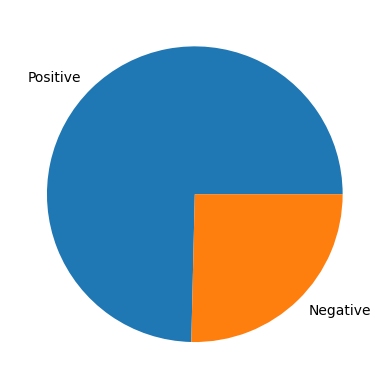

In [44]:
plt.pie(np.array([y_train.value_counts()[0] , y_train.value_counts()[1]]) , labels=['Positive' , 'Negative'])
plt.show()

### Handle inbalance dataset

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote , y_train_smote = smote.fit_resample(vectorizered_x_train, y_train)
print(vectorized_x_train_smote.shape , y_train_smote.shape)

(9456, 1145) (9456,)


In [46]:
y_train_smote.value_counts()

label
0    4728
1    4728
Name: count, dtype: int64

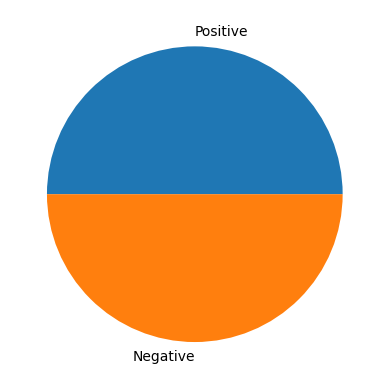

In [47]:
plt.pie(np.array([y_train_smote.value_counts()[0] , y_train_smote.value_counts()[1]]) , labels=['Positive' , 'Negative'])
plt.show()

In [48]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9451    1
9452    1
9453    1
9454    1
9455    1
Name: label, Length: 9456, dtype: int64

In [50]:
vectorizered_x_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
y_test

1937    0
5819    0
3305    1
4868    0
7491    0
       ..
2120    1
2       0
69      0
2871    1
6607    0
Name: label, Length: 1584, dtype: int64

# Model Training and Evaluation

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [75]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

training_scores(y_train_smote,y_train_pred)

y_test_pred = lr.predict(vectorizered_x_test)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.919
	Recall = 0.967
	F1-Score = 0.942
Testing Scores:
	Accuracy = 0.872
	Precision = 0.719
	Recall = 0.849
	F1-Score = 0.779


Training Scores:
	Accuracy = 0.941
	Precision = 0.919
	Recall = 0.967
	F1-Score = 0.942


Testing Scores:
	Accuracy = 0.872
	Precision = 0.719
	Recall = 0.849
	F1-Score = 0.779
